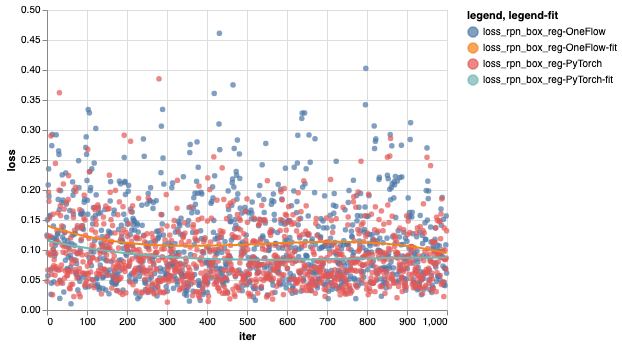

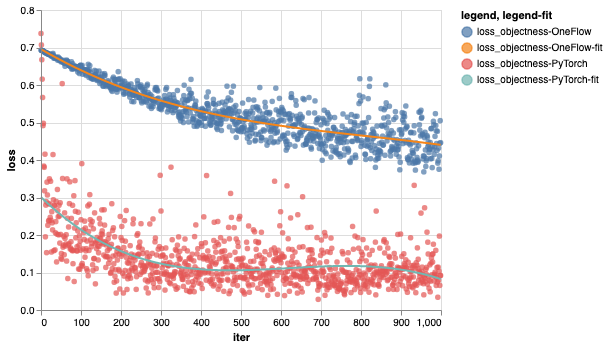

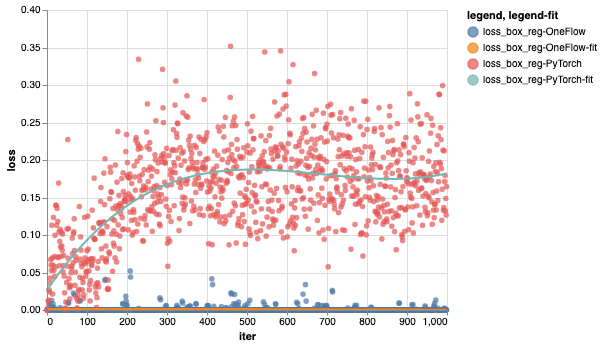

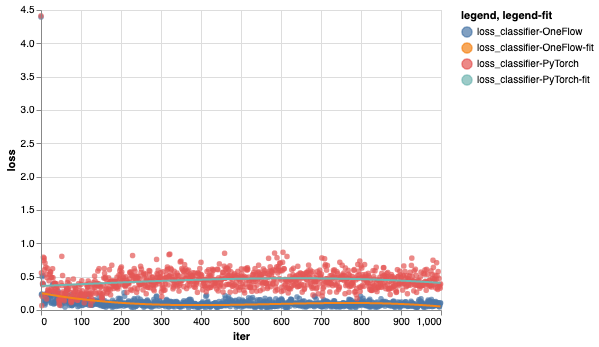

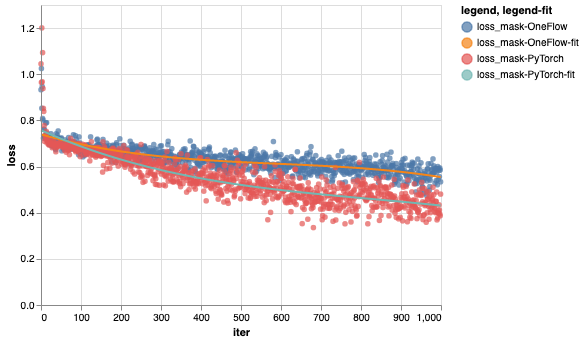

In [40]:
import altair as alt
import pandas as pd
import numpy as np

columns=[
    "loss_rpn_box_reg",
    "loss_objectness",
    "loss_box_reg",
    "loss_classifier",
    "loss_mask",
]

    
def plot(df):
    legends = df["legend"].unique()
    poly_data = pd.DataFrame({'iter': np.linspace(df['iter'].min(), df['iter'].max(), 1000)})
    for legend in legends:
        poly_data[legend + "-fit"] = np.poly1d(np.polyfit(df[df["legend"]==legend]['iter'], df[df["legend"]==legend]['loss'], 3))(poly_data['iter'])

    base = (
        alt.Chart(df)
        .encode(x="petalLength", y="petalWidth", color="legend:N")
    )
    
    chart = (
        base.mark_circle().encode(x="iter", y="loss")
    )
    
    polynomial_fit = alt.Chart(poly_data).transform_fold(
        [legend + "-fit" for legend in legends],
        as_=['legend-fit', 'loss']
    ).mark_line().encode(
        x='iter:Q',
        y='loss:Q',
        color='legend-fit:N'
    )
    chart+=polynomial_fit
    chart.display()

def take_every_n(ndarray, n):
    return ndarray[np.mod(np.arange(ndarray.shape[0]), n) == 0]
    
def make_frame(hisogram, column_index, legend="undefined"):
    ndarray = np.array(hisogram)[:, [column_index, -1]]
    return pd.DataFrame(
        {
            "legend": legend,
            "loss": ndarray[:, 0],
            "iter": ndarray[:, 1]
        }
    )

def plot5(losses_hisogram, source="undefined"):
    for column_index, column_name in enumerate(columns):
        plot(make_frame(losses_hisogram, column_index, column_name))


def plot5in1(losses_hisogram, source="undefined"):
    cat = pd.concat(
        [make_frame(losses_hisogram, column_index, legend="{}-{}".format(column_name,source)) for column_index, column_name in enumerate(columns)],
        axis=0
    )
    plot(cat)

def plot2(losses_hisogram_dict):
    for column_index, column_name in enumerate(columns):
        cat = pd.concat(
            [make_frame(losses_hisogram, column_index, legend="{}-{}".format(column_name,source)) for source, losses_hisogram in losses_hisogram_dict.items()],
            axis=0
        )
        plot(cat)
        
plot2(
    {
        "OneFlow": np.load("/home/caishenghang/wksp/loss-999-batch_size-8-gpu-4-2019-12-05--18-56-38.npy"),
        "PyTorch": np.load("/tmp/shared_with_zwx/pytorch_maskrcnn_losses.npy")[:1000, :]
    }
)
# plot5in1(take_every_n(np.load("/tmp/shared_with_zwx/pytorch_maskrcnn_losses.npy"), 100), "PyTorch")
# plot5(take_every_n(np.load("/tmp/shared_with_zwx/pytorch_maskrcnn_losses.npy"), 100), "PyTorch")